<a href="https://colab.research.google.com/github/mklemos/together_bug/blob/main/Together_AI_Image_playground_Bug_Issue_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Together AI Image playground Potential Bug/Issue Report

## Expected Behavior with Default Perameters and example Calls in Image Playground

This document outlines discrepancies found between the API playground output and the actual API behavior for image generation with Together AI, and provides solutions.
This is potentially a UI issue or an API design issue.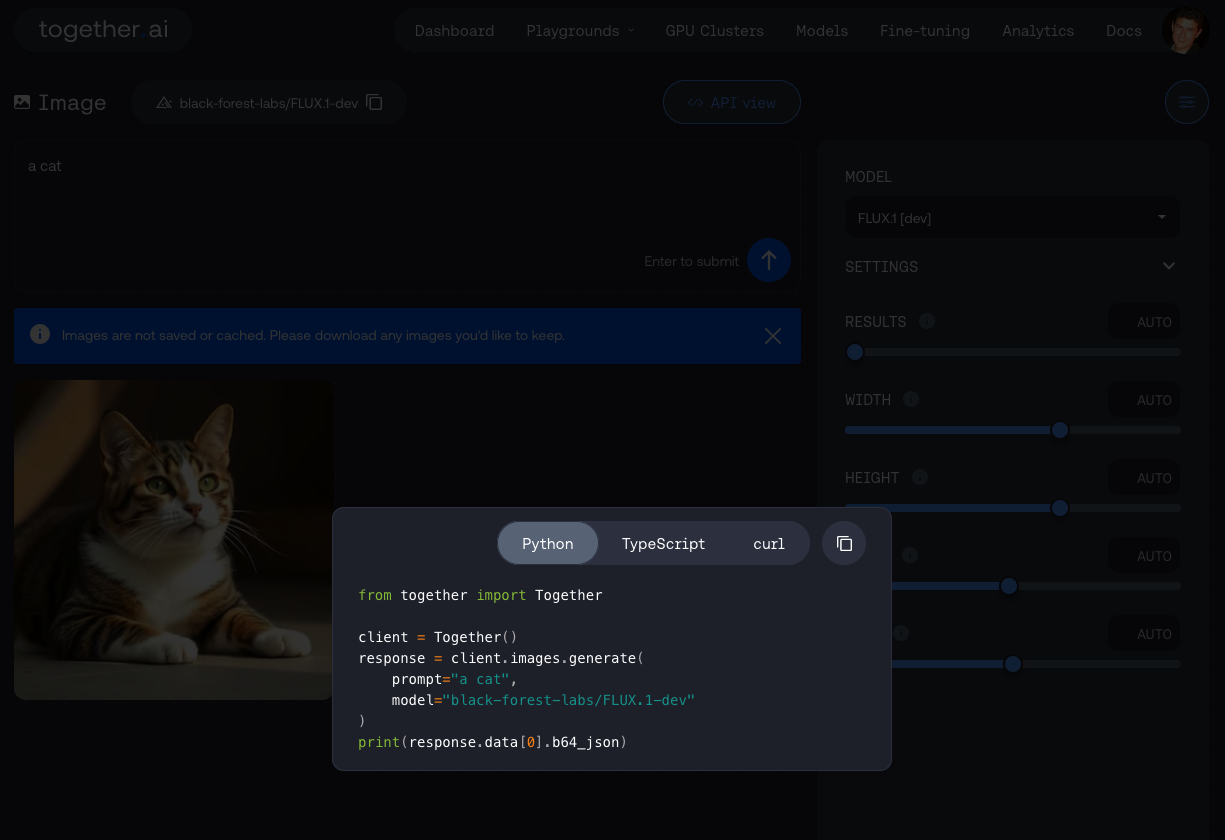

In [9]:
pip install together

In [11]:
import json

### We call the API as shown in the example "API view"
We would expect an example API call to return a value. Not a None/null value.

In [19]:
from together import Together

client = Together()
response = client.images.generate(
    prompt="a cat",
    model="black-forest-labs/FLUX.1-dev"
)
print(response.data[0].b64_json)

None


However, with the provided "API view" code you can see we receive `None` above.

Below we print the json showing the full response. Again notice the `null` value for `b64_json`.

This indicates that the default `response_format` is `url`.

In [15]:
response_dict = response.model_dump()
print(json.dumps(response_dict, indent=2))

{
  "id": "nucqjaq-4yUbBN-9420b1cfcbf88b98-PDX",
  "model": "black-forest-labs/FLUX.1-dev",
  "object": "list",
  "data": [
    {
      "index": 0,
      "b64_json": null,
      "url": "https://api.together.ai/imgproxy/Oyen7nZ9sBrOwSYmeQKG0gAhJySTb2t5pbiVP4OUaOY/format:jpeg/aHR0cHM6Ly90b2dldGhlci1haS1iZmwtaW1hZ2VzLXByb2QuczMudXMtd2VzdC0yLmFtYXpvbmF3cy5jb20vaW1hZ2VzLzFmMTQzYmFlMDc5NjQ1MTBiOWUzMTYxOTBjMWI4NGRiYzk3NmVmMmE5ODU0YzZhYTU0YzhlZDY2YzA3MWE3Yjg_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ29udGVudC1TaGEyNTY9VU5TSUdORUQtUEFZTE9BRCZYLUFtei1DcmVkZW50aWFsPUFTSUFZV1pXNEhWQ0M0VENLWURVJTJGMjAyNTA1MTklMkZ1cy13ZXN0LTIlMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUwNTE5VDA0MDE0NVomWC1BbXotRXhwaXJlcz0zNjAwJlgtQW16LVNlY3VyaXR5LVRva2VuPUlRb0piM0pwWjJsdVgyVmpFTXolMkYlMkYlMkYlMkYlMkYlMkYlMkYlMkYlMkYlMkZ3RWFDWFZ6TFhkbGMzUXRNaUpITUVVQ0lRRGRBRVFqbGJ2SHJkZkJscGRNMkFLdTMyd0RIVWswUTdBaTJudyUyRjhnd1BSUUlnSWNMSFc4cmZOVkJ1enBWcmVoaFlhYUV1cmhSSGVUTnd1aTduZUpmbU9uUXFtUVVJaGYlMkYlMkYlMkYlMkYlMkYlM

### Now we call the API setting the response_format


In [21]:
from together import Together

client = Together()
response = client.images.generate(
    prompt="a cat",
    model="black-forest-labs/FLUX.1-dev",
    response_format="b64_json" # Add this parameter
)

In [22]:
print(response.data[0].b64_json)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDw6koopDCiiigAooooAKKKKYBRRRQAUlLSUALRRRSAUU6minCkMUUtJS0gClpKKAFooooAKKKKACiiigAooooAKKKKACiiigAooooASiiigBKKWkoAKSlopgJRRRQAUhpaSgBKKKKBCUUtFMBKKMUYoAKSiimAUUUUCCiiigAo

This **ABOVE** is the **expected** result from the `print(response.data[0].b64_json)` originally expected from the initial API view example.

In [17]:
response_dict = response.model_dump()
print(json.dumps(response_dict, indent=2))

{
  "id": "nucrCzw-4yUbBN-9420b4102b798b98-PDX",
  "model": "black-forest-labs/FLUX.1-dev",
  "object": "list",
  "data": [
    {
      "index": 0,
      "b64_json": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQABAADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwCeO

### Potential Solution
The simple solution is to update the code in the "API view" to include the     `response_format="b64_json"` perameter. As this is the behavior expected from an example provided by the Company to developers interested. This is at least indicated in the `print(response.data[0].b64_json)` value in the example.

However, should the example be changed to include `print(response.data[0].url)` this could accomidate the apprent default `response_format` used when not explicitly calling the generate API with a specific `response_format`.

### Potential Costlier Solution
By default the API could include both `url` and `b64_json` as default return values. This way the "API view" example is correct in it's current form on the playground webpage. This could have implications on cost per call as the `b64_json` is potentially too large a string to return on every call.

## Model required perameters not respected in FLUX.1-schnell when set with "AUTO" perams.

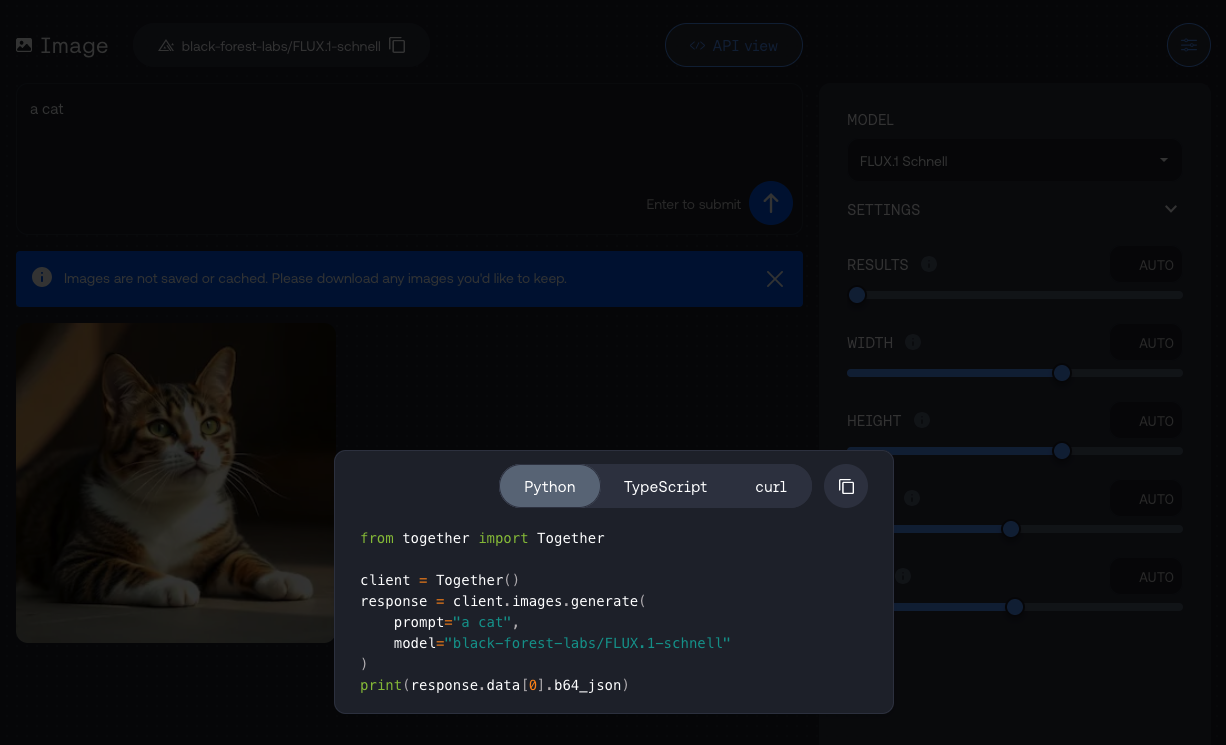

In [24]:
from together import Together

client = Together()
response = client.images.generate(
    prompt="a cat",
    model="black-forest-labs/FLUX.1-schnell"
)
print(response.data[0].b64_json)

InvalidRequestError: Error code: 400 - {"message": "steps must be between 1 and 12", "type_": "invalid_request_error", "param": "steps"}

We would expect the default behavior of the Playground which already sets perams such as `prompt="a cat", model="black-forest-labs/FLUX.1-schnell"`
as indicated by the user who entered these values via the UI "prompt" text box and "model" drop down menu to also behave in such a way when set with the default "AUTO" settings shown above.

However, in the case of the "black-forest-labs/FLUX.1-schnell" model these default/AUTO perams arent being set when the user clicks the API view.

One such perameter being the "STEPS" value which seems to default to 20 (this is a hunch and needs to be verified)


When the default API view example is called we get:

`InvalidRequestError: Error code: 400 - {"message": "steps must be between 1 and 12", "type_": "invalid_request_error", "param": "steps"}`

In [26]:
from together import Together

client = Together()
response = client.images.generate(
    prompt="a cat",
    model="black-forest-labs/FLUX.1-schnell",
    steps=6
)
print(response.data[0].b64_json)

None


Again we get None as outlined in the first bug example in the document.


However, if grab the entire response we see:


In [27]:
response_dict = response.model_dump()
print(json.dumps(response_dict, indent=2))

{
  "id": "nud8DQh-4yUbBN-9421004ffafb11a3-PDX",
  "model": "black-forest-labs/FLUX.1-schnell",
  "object": "list",
  "data": [
    {
      "index": 0,
      "b64_json": null,
      "url": "https://api.together.ai/imgproxy/JectSSExhH4tKY-8aSUd8sdZVihLQOKy0e0Qa_xxjXo/format:jpeg/aHR0cHM6Ly90b2dldGhlci1haS1iZmwtaW1hZ2VzLXByb2QuczMudXMtd2VzdC0yLmFtYXpvbmF3cy5jb20vaW1hZ2VzLzI4YThiMTRlMWZjYTA4MzQwOTY0MTE5NWFlODgzZDQzNjNjYTgxZDY1MDFhMzg1YjM1NGFiZjJmZDI3MWQ0ZjQ_WC1BbXotQWxnb3JpdGhtPUFXUzQtSE1BQy1TSEEyNTYmWC1BbXotQ29udGVudC1TaGEyNTY9VU5TSUdORUQtUEFZTE9BRCZYLUFtei1DcmVkZW50aWFsPUFTSUFZV1pXNEhWQ0RDSUtYVzRKJTJGMjAyNTA1MTklMkZ1cy13ZXN0LTIlMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjUwNTE5VDA0NTUxOFomWC1BbXotRXhwaXJlcz0zNjAwJlgtQW16LVNlY3VyaXR5LVRva2VuPUlRb0piM0pwWjJsdVgyVmpFTTMlMkYlMkYlMkYlMkYlMkYlMkYlMkYlMkYlMkYlMkZ3RWFDWFZ6TFhkbGMzUXRNaUpHTUVRQ0lCdXo4T3V1cUMlMkI3RUZpc1BCZmRCZVdXMCUyQnBWS0ZKeFZNdzdXSkZ5WGVCZ0FpQmR6MVFuRUQwdHBZcHFnJTJCRmlvWmFVNDZXZzBjTk8xenpUYjlnSDJ4V2duU3FaQlFpRyUyRiUyRiUyRiUyR

This does infact show us our expected result.



### Potential Solution/Problem Discussion
We would expect that the default/AUTO perams of the UI should modify the "API View" to represent the model's unique attributes. So in the case of the "schnell" model an API View example should be setting those perams as this aligns with the "AUTO" behavior one would expect.

Should the User modify those perams they indeed get added to the example API call. Which given that behaviour one would expect that the defaults are added if the "Schnell" model or any other model for that matter require special conditions to their perameters, like the Schnell model needing "steps must be between 1 and 12".

## Cross Reference with docs.together.ai

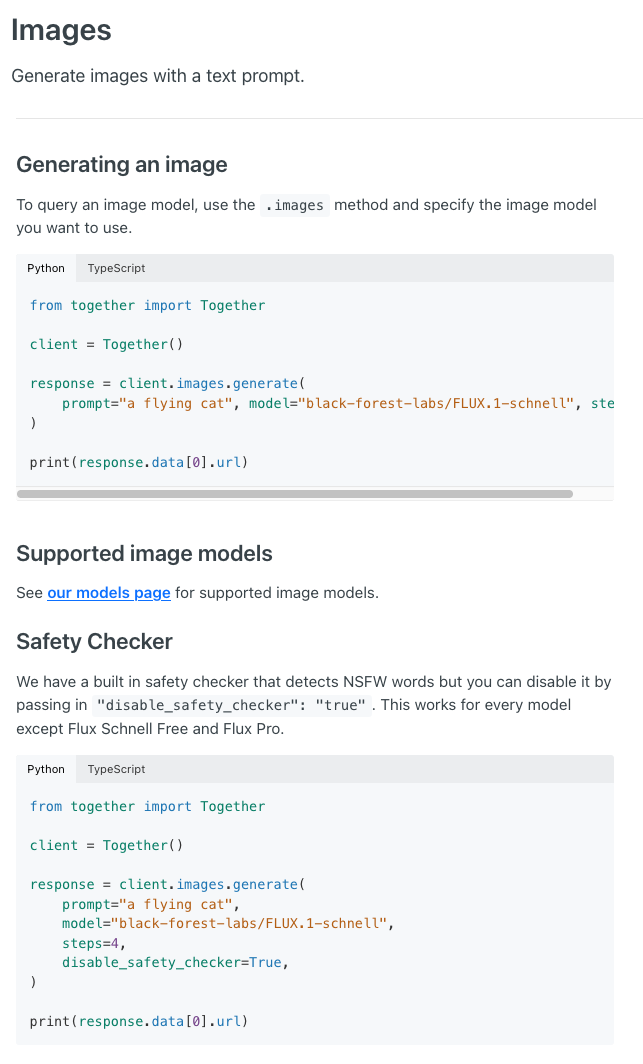

So we see that the Documentation clearly uses `url` as the default return print object.
```
from together import Together

client = Together()

response = client.images.generate(
    prompt="a flying cat",
    model="black-forest-labs/FLUX.1-schnell",
    steps=4,
    disable_safety_checker=True,
)

print(response.data[0].url)

```

Also the call specifices the special 1-12 steps required for the Schnell model.

So this shows us the documentation located at https://docs.together.ai/docs/images-overview is at least more up-to-date and seemly disagrees with the playground examples.